## Explore and Format

In this step we are going to explore the data, to see how the time series behave

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

In [5]:
df = pd.read_csv('data/train_sample.csv',parse_dates=['date'], date_parser=dateparse,low_memory=False).iloc[:,1:]

In [6]:
df.sample(3)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1061541,58113188,2015-10-02,25,1456922,1.0,False
1665080,101517990,2016-12-30,25,1986825,2.0,False
1324910,74069686,2016-03-22,25,1047679,132.0,False


In [7]:
df = df.sort_values(['item_nbr','unit_sales'])

In [8]:
random_items = list(np.random.choice(df.item_nbr.unique(),4))
random_items

[2002136, 2089789, 1576329, 908741]

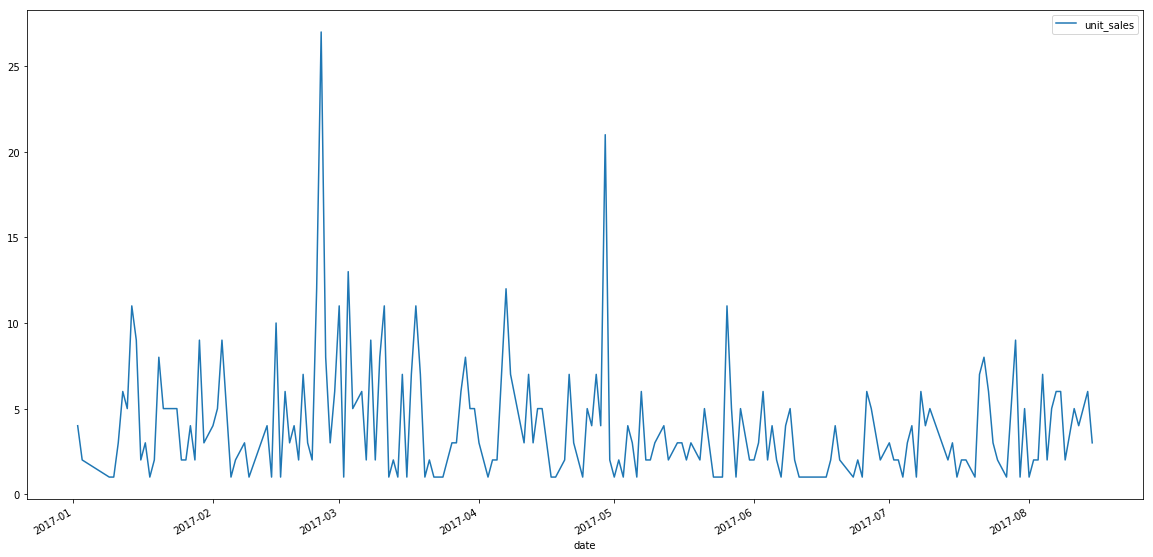

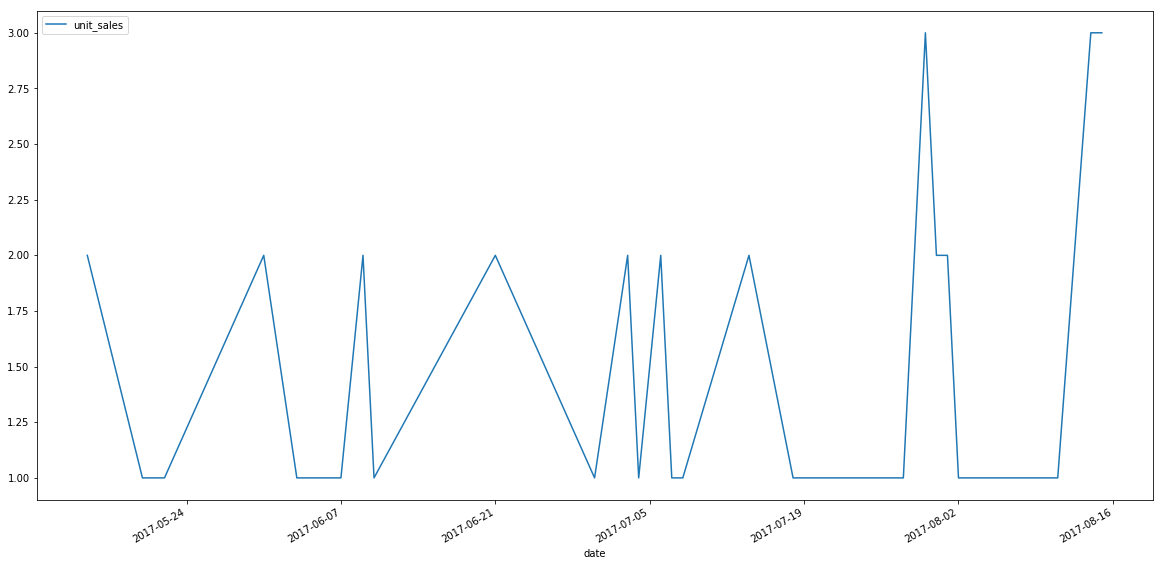

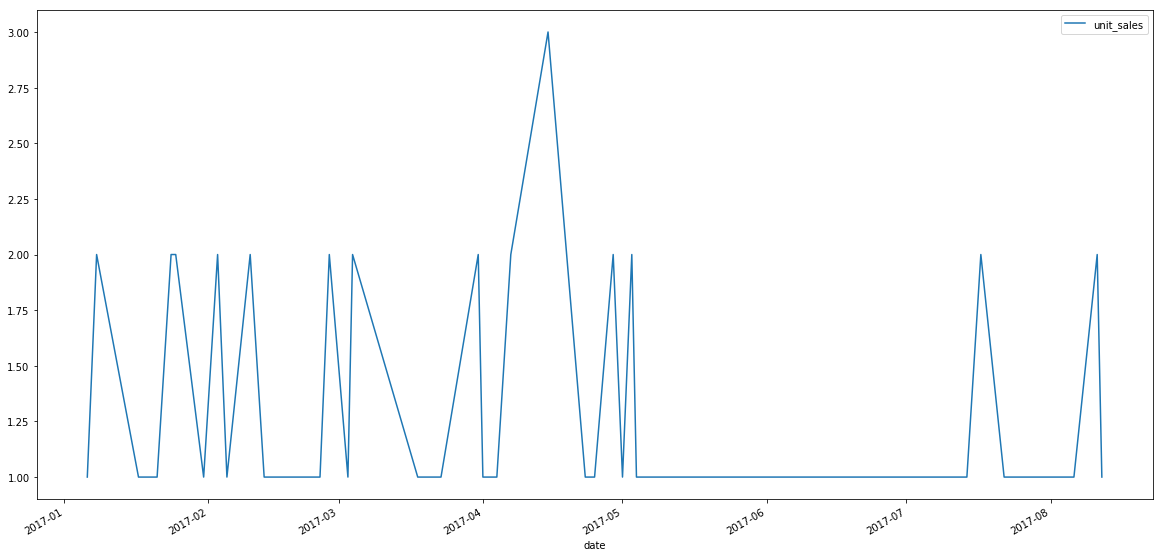

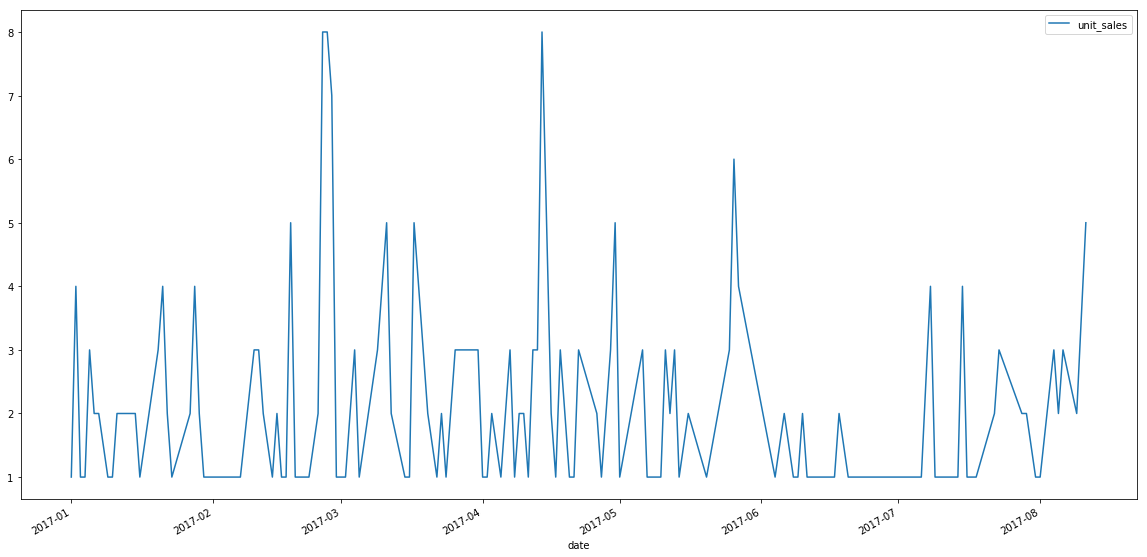

In [9]:
for i in range(4):
    df[(df['item_nbr']==random_items[i]) & (df['date'].dt.year==2017)].plot(x='date', y='unit_sales');



## Create Target Time Series

Now we are going to create the input Data Set for Amazon Forecast following the guidelines of the Retail Domain in Amazon Forecast. Check <a href='https://docs.aws.amazon.com/forecast/latest/dg/retail-domain.html' > the docs </a>


    item_id (string) – A unique identifier for the item or product that you want to predict the demand for.

    timestamp (timestamp)

    demand (float) – The number of sales for that item at the timestamp. This is also the target field for which Amazon Forecast generates a forecast.



In [10]:
df[['item_nbr','date','unit_sales']].to_csv('target_time_series.csv',index=False,header=False)